# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari Kaggle dengan nama [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)
   


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [78]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [79]:
cd '/content/drive/MyDrive/Dicoding/Predicting customer churn/'

/content/drive/MyDrive/Dicoding/Predicting customer churn


In [80]:
# Membaca dataset
df = pd.read_csv('Eksperimen_SML_Fairuz Rafida/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur dan Ringkasan Dataset

In [81]:
df.shape

(7043, 21)

In [82]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [83]:
# Konversi nilai 'TotalCharges' ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Daftar kolom yang memiliki dua nilai: 'Yes'/'No' atau 'True'/'False'
yes_no_columns = [
    col for col in df.columns
    if df[col].dropna().nunique() <= 2 and set(df[col].dropna().unique()).issubset({'Yes', 'No', 'True', 'False'})
]

# Mengubah ke tipe boolean
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': True, 'No': False, 'True': True, 'False': False})

# Menampilkan tipe data kolom
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [84]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Pemeriksaan Missing Values (Nilai Kosong)

In [85]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Deteksi Data Duplikat

In [86]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


## Distribusi Variabel Numerik

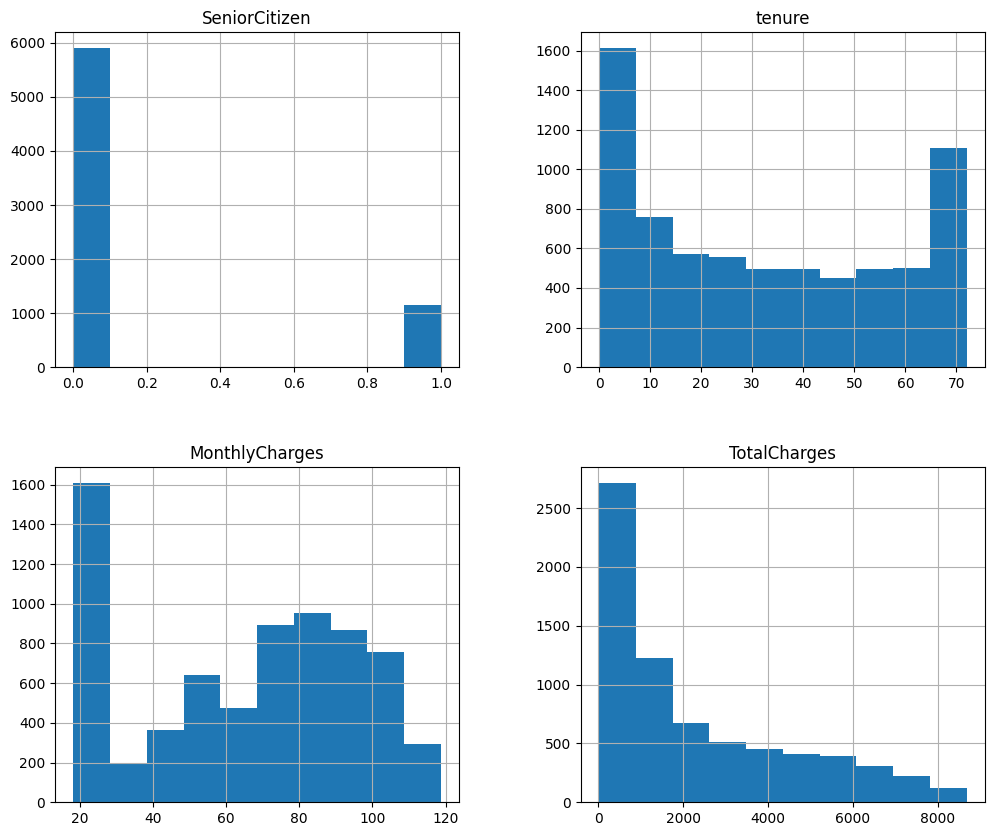

In [87]:
df.hist(figsize=(12, 10))
plt.show()

## Distribusi Variabel Kategorikal

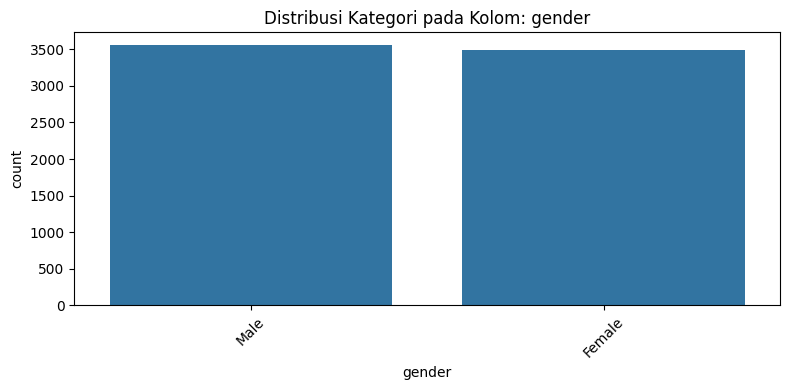

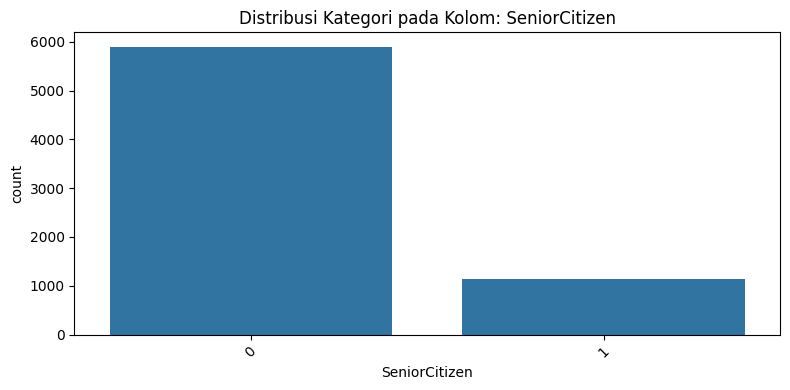

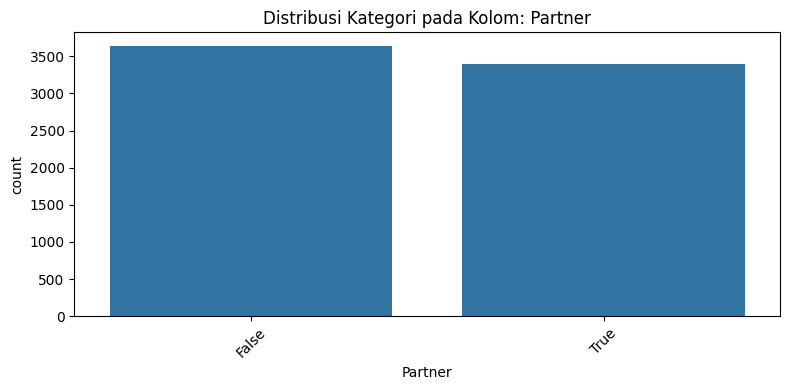

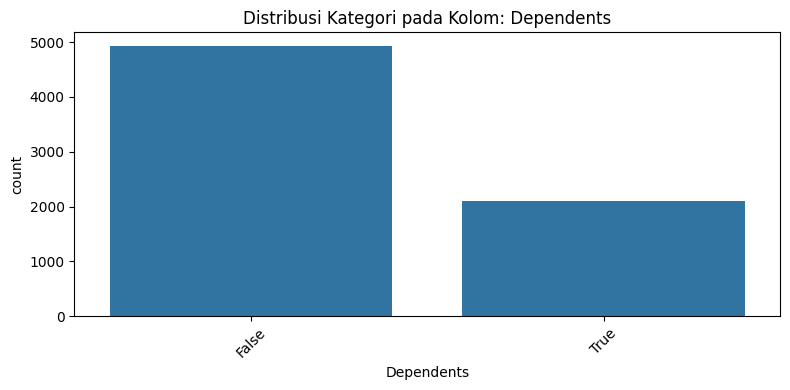

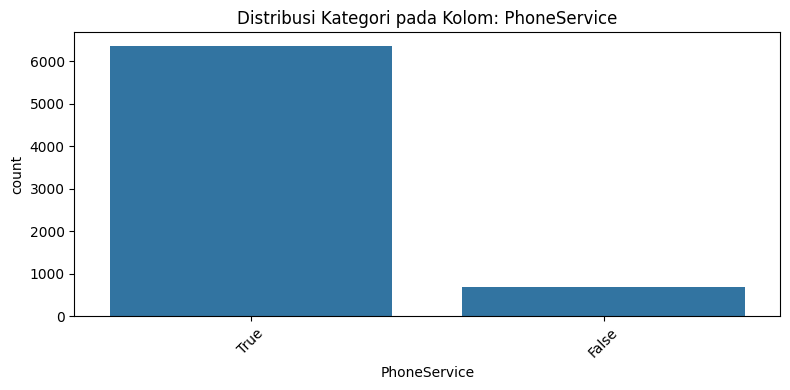

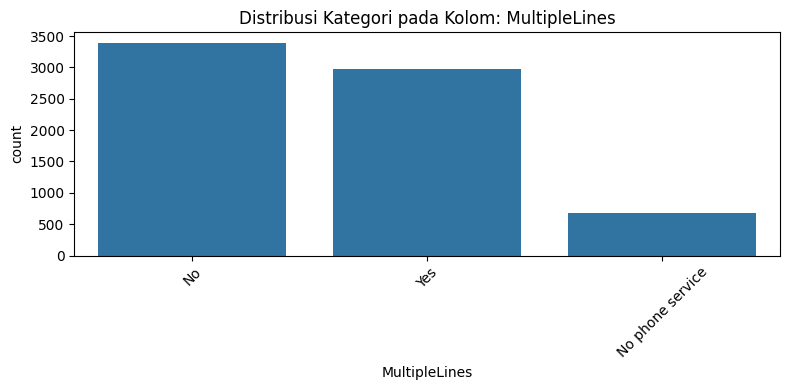

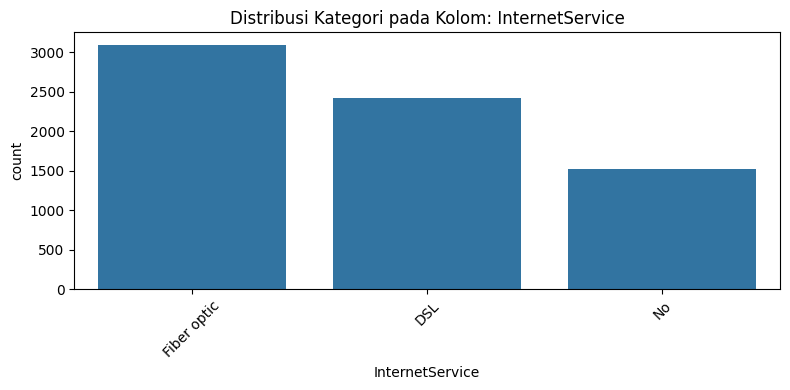

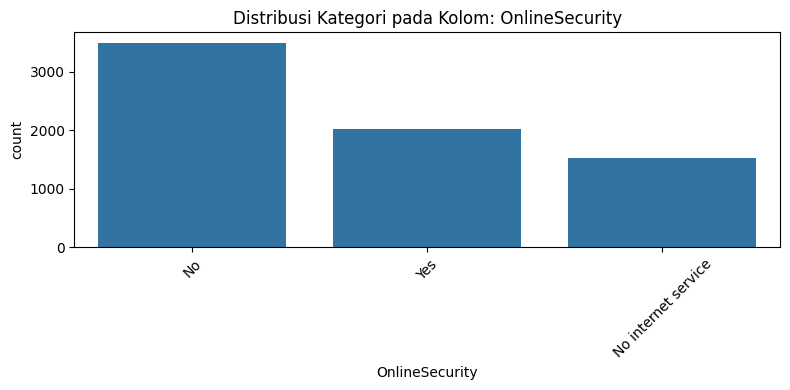

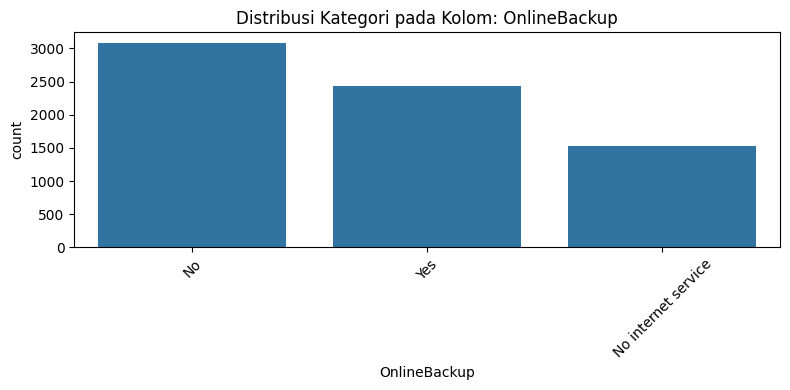

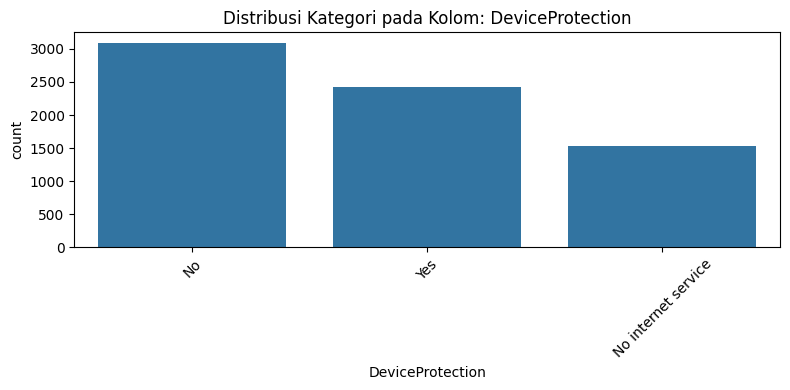

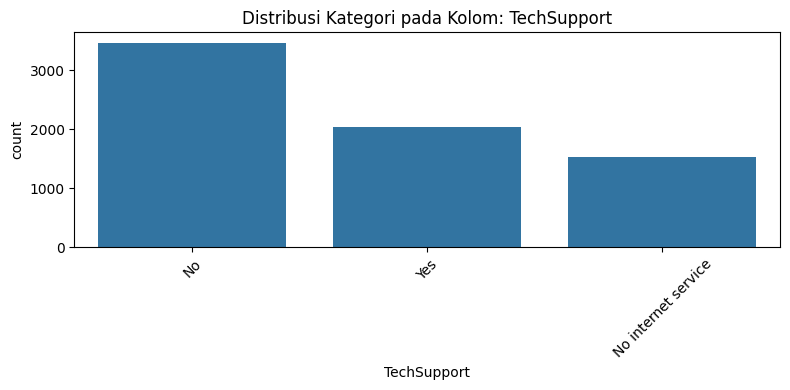

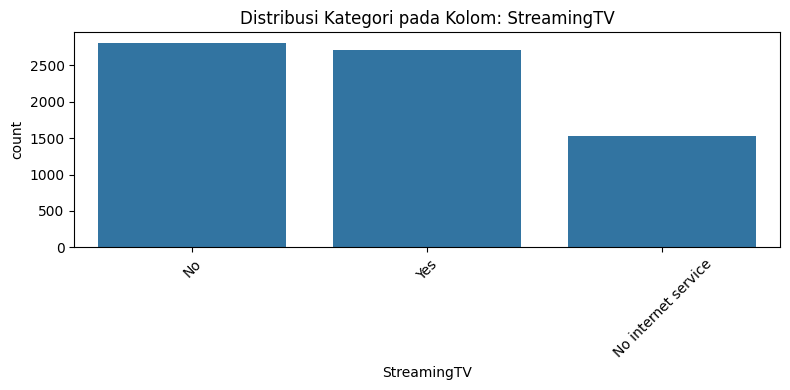

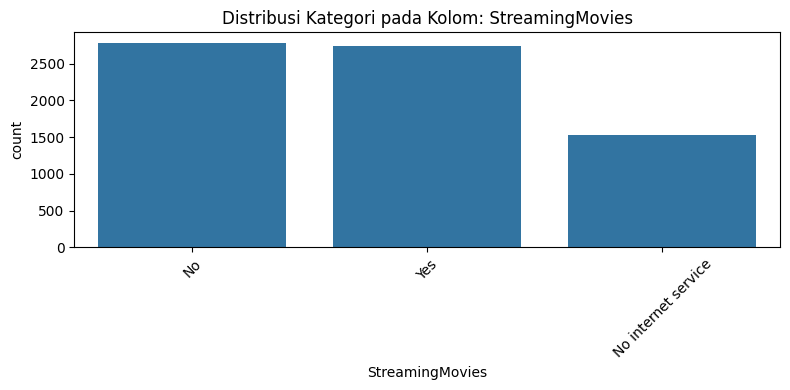

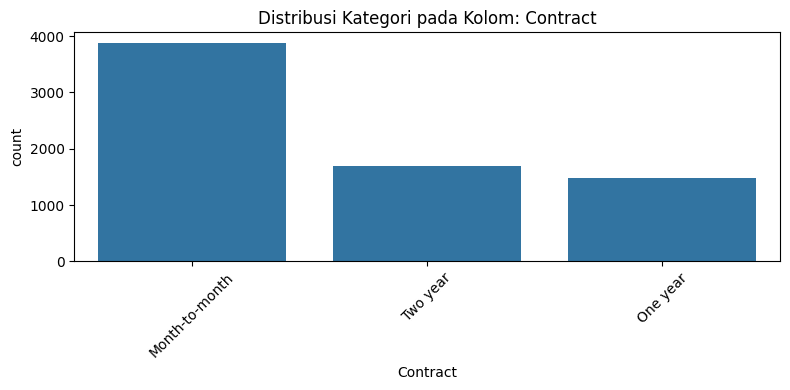

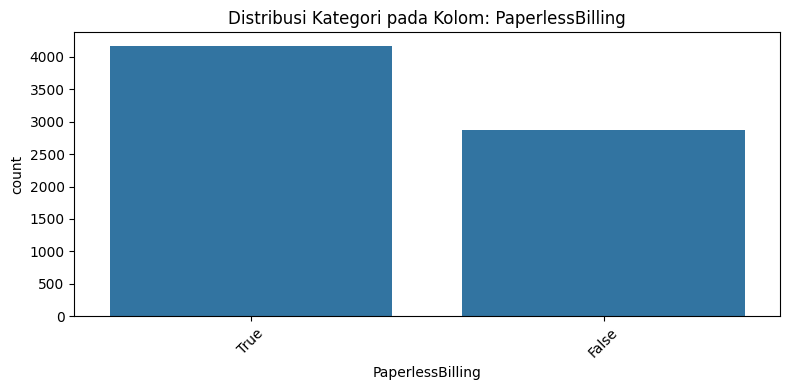

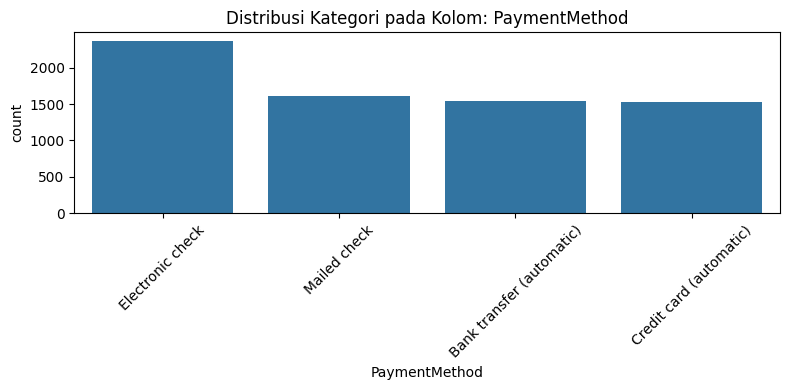

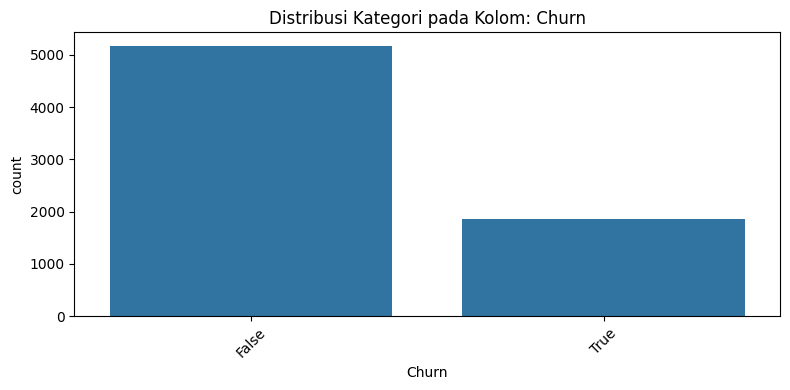

In [88]:
# Menentukan kolom kategorikal untuk divisualisasikan
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Menampilkan distribusi kategori
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribusi Kategori pada Kolom: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Distribusi Target / Label (Churn)

Churn
False    5174
True     1869
Name: count, dtype: int64


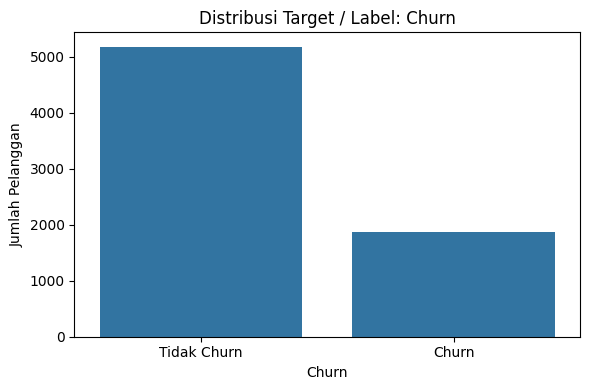

In [89]:
# Menampilkan jumlah masing-masing label
print(df['Churn'].value_counts())

# Visualisasi distribusi label
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Target / Label: Churn')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Feature Selection

In [90]:
# Buang kolom yang tidak diperlukan
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])


## Deteksi dan Penanganan Outlier

In [91]:
# Pilih fitur numerik
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Inisialisasi DataFrame untuk menandai outlier
outlier_flags = pd.DataFrame(index=df.index)

# Deteksi outlier menggunakan metode IQR
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Tandai sebagai outlier jika di luar rentang
    outlier_flags[col + '_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)


# Tampilkan hasil
print("Jumlah outlier pada setiap fitur:")
print(outlier_flags.sum())

Jumlah outlier pada setiap fitur:
tenure_outlier            0
MonthlyCharges_outlier    0
TotalCharges_outlier      0
dtype: int64


## Encoding Data Kategorikal

In [92]:
# Buang 'customerID' karena itu hanya ID unik
if 'customerID' in categorical_columns:
    categorical_columns.remove('customerID')

# Tampilkan daftar kolom kategorikal
print("Kolom kategorikal yang akan diencoding:")
print(categorical_columns)

# One-hot encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Tampilkan beberapa kolom hasil encoding
df_encoded.head()

Kolom kategorikal yang akan diencoding:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_True,Dependents_True,PhoneService_True,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_True
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## Normalisasi Fitur

In [93]:
# Drop baris dengan nilai kosong (jika ada)
df_encoded = df_encoded.dropna(subset=numerical_features)

# Normalisasi (Min-Max Scaling) ===
min_max_scaler = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[numerical_features] = min_max_scaler.fit_transform(df_encoded[numerical_features])

# Menampilkan hasil transformasi
print("Contoh hasil Normalisasi:")
print(df_normalized[numerical_features].head())

Contoh hasil Normalisasi:
     tenure  MonthlyCharges  TotalCharges
0  0.000000        0.115423      0.001275
1  0.464789        0.385075      0.215867
2  0.014085        0.354229      0.010310
3  0.619718        0.239303      0.210241
4  0.014085        0.521891      0.015330


In [94]:
df_normalized.to_csv('WA_Fn-UseC_-Telco-Customer-Churn_preprocessing.csv', index=False)

In [95]:
print(df_normalized.dtypes)

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
SeniorCitizen_1                             bool
Partner_True                                bool
Dependents_True                             bool
PhoneService_True                           bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter